# Adquisici√≥n de Datos

En esta primera parte, se mostrar√° el script que invoca las distintas funcionalidades del c√≥digo fuente del proyecto para realizar la adquisici√≥n de datos.

En primer lugar, se traen todas las funciones y rutinas que ser√°n utilizadas para este primer proceso de adquisici√≥n de datos

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.MLDS6_Assets.database import authenticateKaggle, downloadUnzipDataset , deleteDirectoryAndContents, createDirectoryWithSubdirs, separateImages
from src.MLDS6_Assets.visualization import showImage , printTree

%matplotlib inline

El primer paso, es realizar la respectiva conexi√≥n con la API de Kaggle para realizar la extracci√≥n inicial y desempaquetamiento de los datos.

Esta primera parte consiste en autenticarse con la api de Kaggle usando el archivo `kaggle.json`, para posteriormente descargar el dataset [Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia) que se encuentra libe y disponible en esta plataforma

In [2]:
url = 'https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia'
targetPath = '../data'
api = authenticateKaggle()
downloadUnzipDataset(api,url,targetPath)

Authenticated with Kaggle successfully.

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.29G/2.29G [11:24<00:00, 3.60MB/s]



Dataset 'paultimothymooney/chest-xray-pneumonia' downloaded and unzipped to '../data'.



Podemos ahora visualizar las carpetas de contienen los datos adquiridos desde kaggle

In [3]:
deleteDirectoryAndContents('../data/chest_xray/__MACOSX')
deleteDirectoryAndContents('../data/chest_xray/chest_xray')

Deleted directory and all contents: ../data/chest_xray/__MACOSX
Deleted directory and all contents: ../data/chest_xray/chest_xray


In [4]:
printTree('../data/chest_xray')

üìÅ chest_xray
    üìÅ test
        üìÅ NORMAL
        üìÅ PNEUMONIA
    üìÅ train
        üìÅ NORMAL
        üìÅ PNEUMONIA
    üìÅ val
        üìÅ NORMAL
        üìÅ PNEUMONIA


Como es visible, los datos no se encuentran particionados en las 3 clases de inter√©s. Por consiguiente, se dise√±ar√° la partici√≥n en dichas clases de acuerdo los nombres de los archivos

In [5]:
base_directory = '../data'
subdirectories = ['train', 'test', 'val']
subsubdirectories = ['bacterialPneumonia','virusPneumonia','Normal']

dirs = createDirectoryWithSubdirs(base_directory, subdirectories)
final_dirs = []
for subdir in dirs:
   final_dirs += createDirectoryWithSubdirs(subdir, subsubdirectories)

Directory created: ../data\train
Directory created: ../data\test
Directory created: ../data\val
Directory created: ../data\train\bacterialPneumonia
Directory created: ../data\train\virusPneumonia
Directory created: ../data\train\Normal
Directory created: ../data\test\bacterialPneumonia
Directory created: ../data\test\virusPneumonia
Directory created: ../data\test\Normal
Directory created: ../data\val\bacterialPneumonia
Directory created: ../data\val\virusPneumonia
Directory created: ../data\val\Normal


In [8]:
for dir in final_dirs:
    separateImages('../data/chest_xray/',dir)

Copied files to ../data\train\bacterialPneumonia
Copied files to ../data\train\virusPneumonia
Copied files to ../data\train\Normal
Copied files to ../data\test\bacterialPneumonia
Copied files to ../data\test\virusPneumonia
Copied files to ../data\test\Normal
Copied files to ../data\val\bacterialPneumonia
Copied files to ../data\val\virusPneumonia
Copied files to ../data\val\Normal


In [9]:
deleteDirectoryAndContents('../data/chest_xray')

Deleted directory and all contents: ../data/chest_xray


Tambi√©n podemos visualizar algunas imagenes de cada conjunto de datos

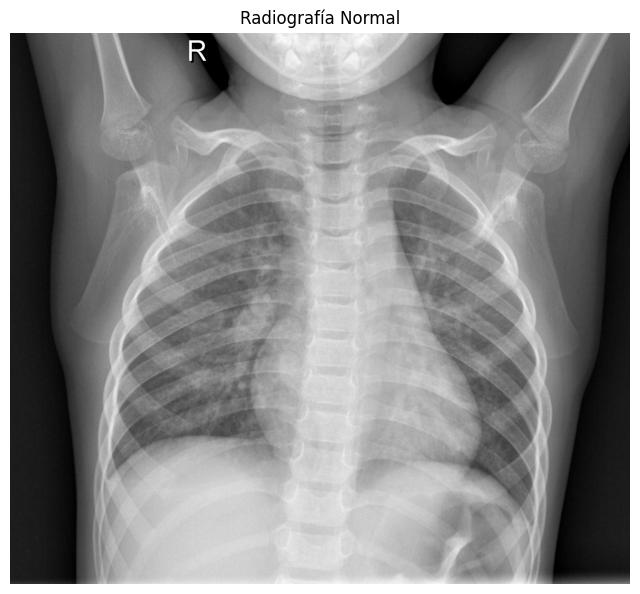

In [10]:
title='Radiograf√≠a Normal'
path = '../data/train/NORMAL/IM-0115-0001.jpeg'
showImage(path = path, title=title)

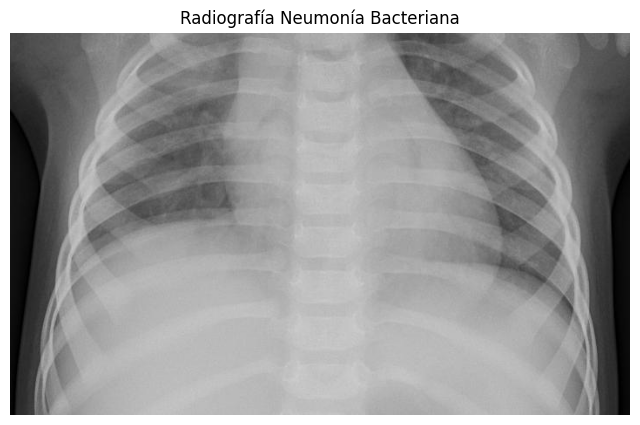

In [12]:
title='Radiograf√≠a Neumon√≠a Bacteriana'
path = '../data/train/bacterialPneumonia/person1_bacteria_1.jpeg'
showImage(path = path, title=title)

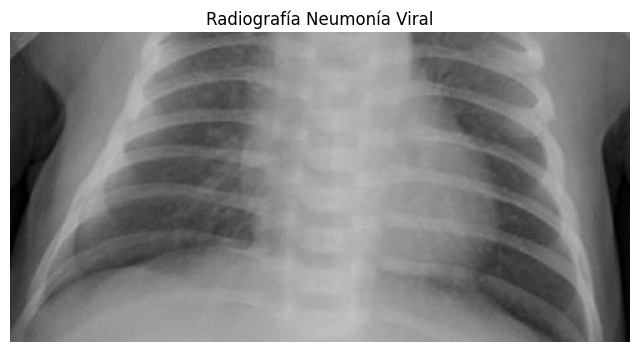

In [13]:
title='Radiograf√≠a Neumon√≠a Viral'
path = '../data/train/virusPneumonia/person281_virus_578.jpeg'
showImage(path = path, title=title)